In [1]:
#Machine failure prediction


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
df=pd.read_csv("predictive_maintenance.csv")
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [22]:
df.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [24]:
df=df.drop(["UDI","Product ID"], axis=1)

In [25]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [17]:
#Exploratry data analysis

In [40]:
df.groupby(['Target','Failure Type']).count().drop(['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]'],axis=1).rename(columns={'Type':'count'})

count
Target Failure Type                   
0      No Failure                 9643
       Random Failures              18
1      Heat Dissipation Failure    112
       No Failure                    9
       Overstrain Failure           78
       Power Failure                95
       Tool Wear Failure            45

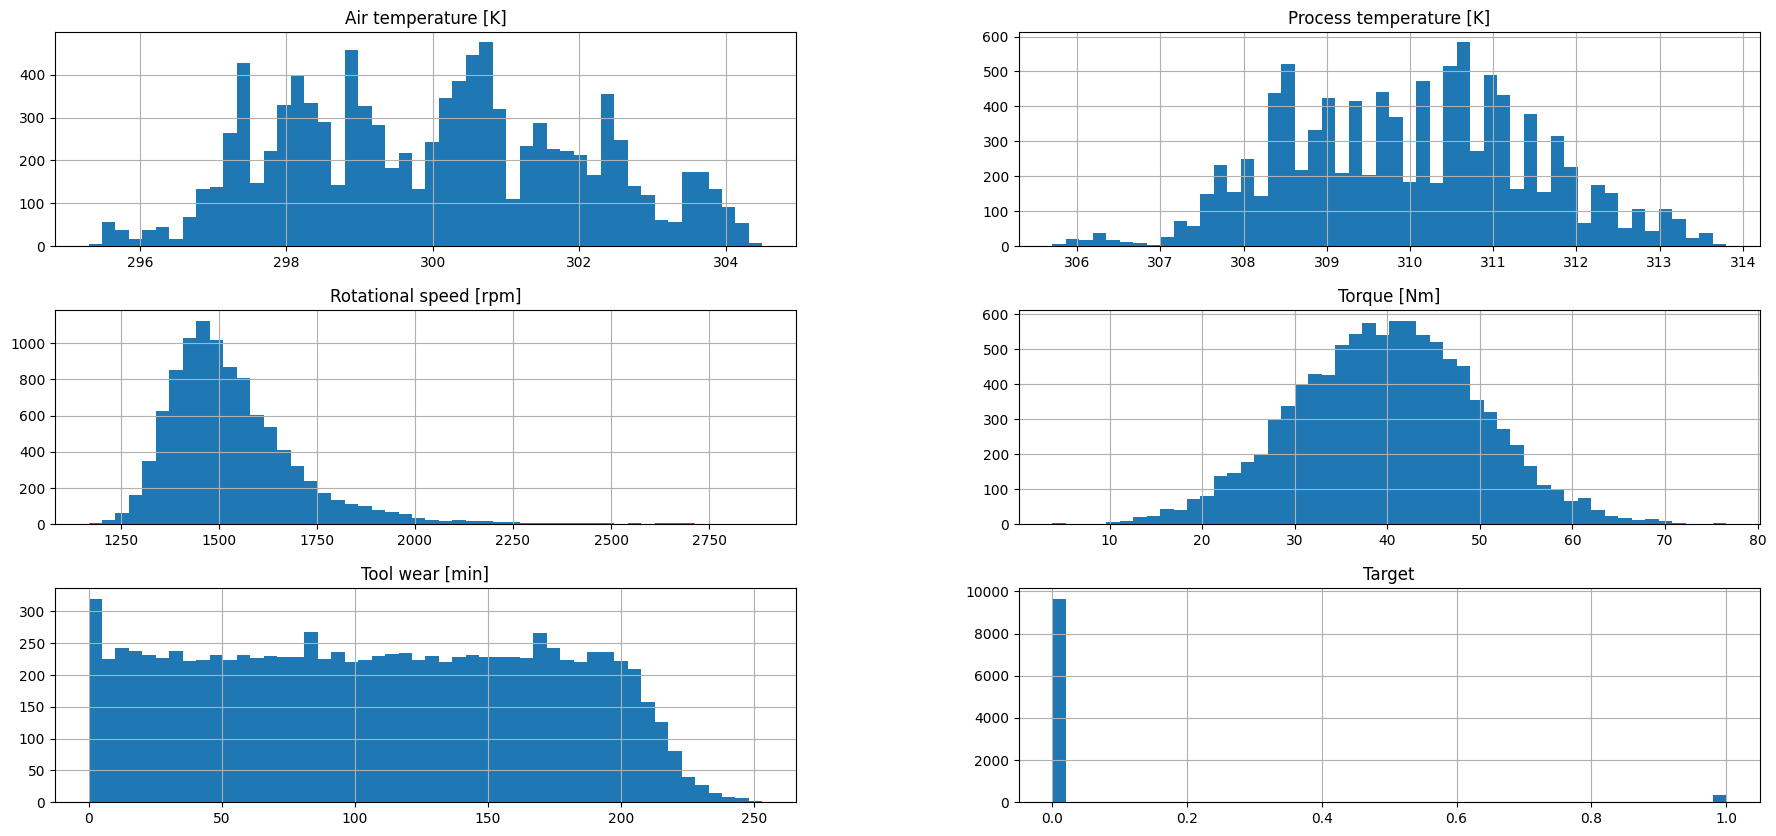

In [43]:
df.hist(figsize =(22,10), bins=50)
plt.show()

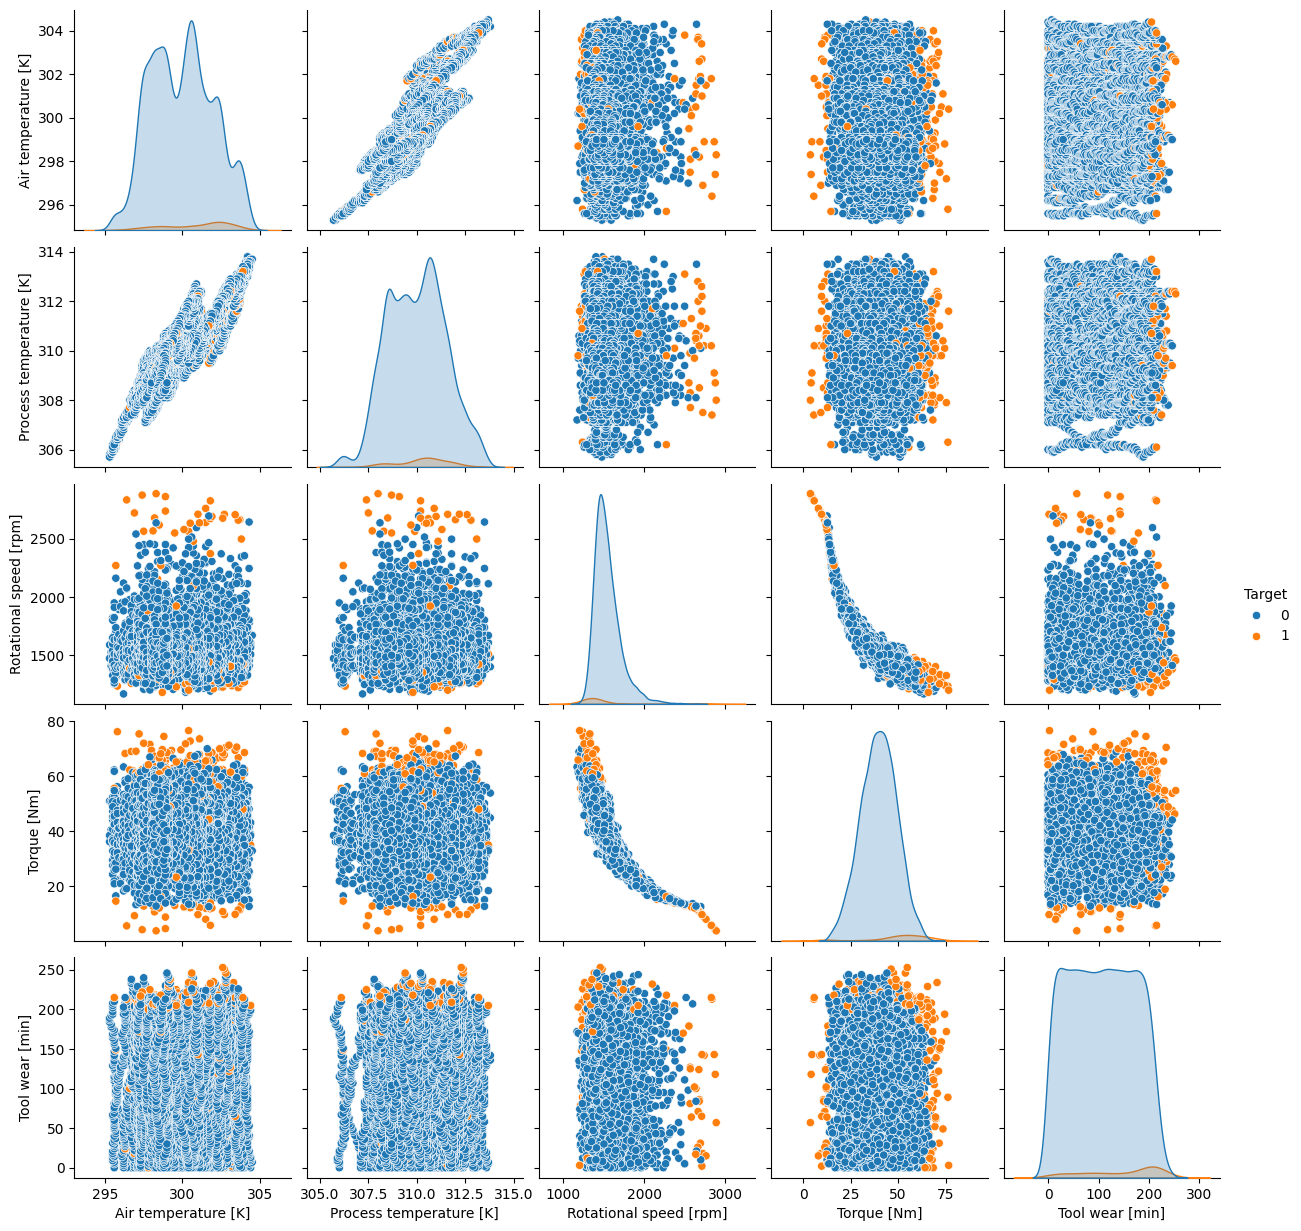

In [46]:
sns.pairplot(df,hue="Target")

In [55]:
def feat_prob(feature, data):
    x = sorted(data[feature].unique())
    y = [round((data[data[feature] >= j]['Target'].mean() * 100), 2) for j in x]
    return x, y

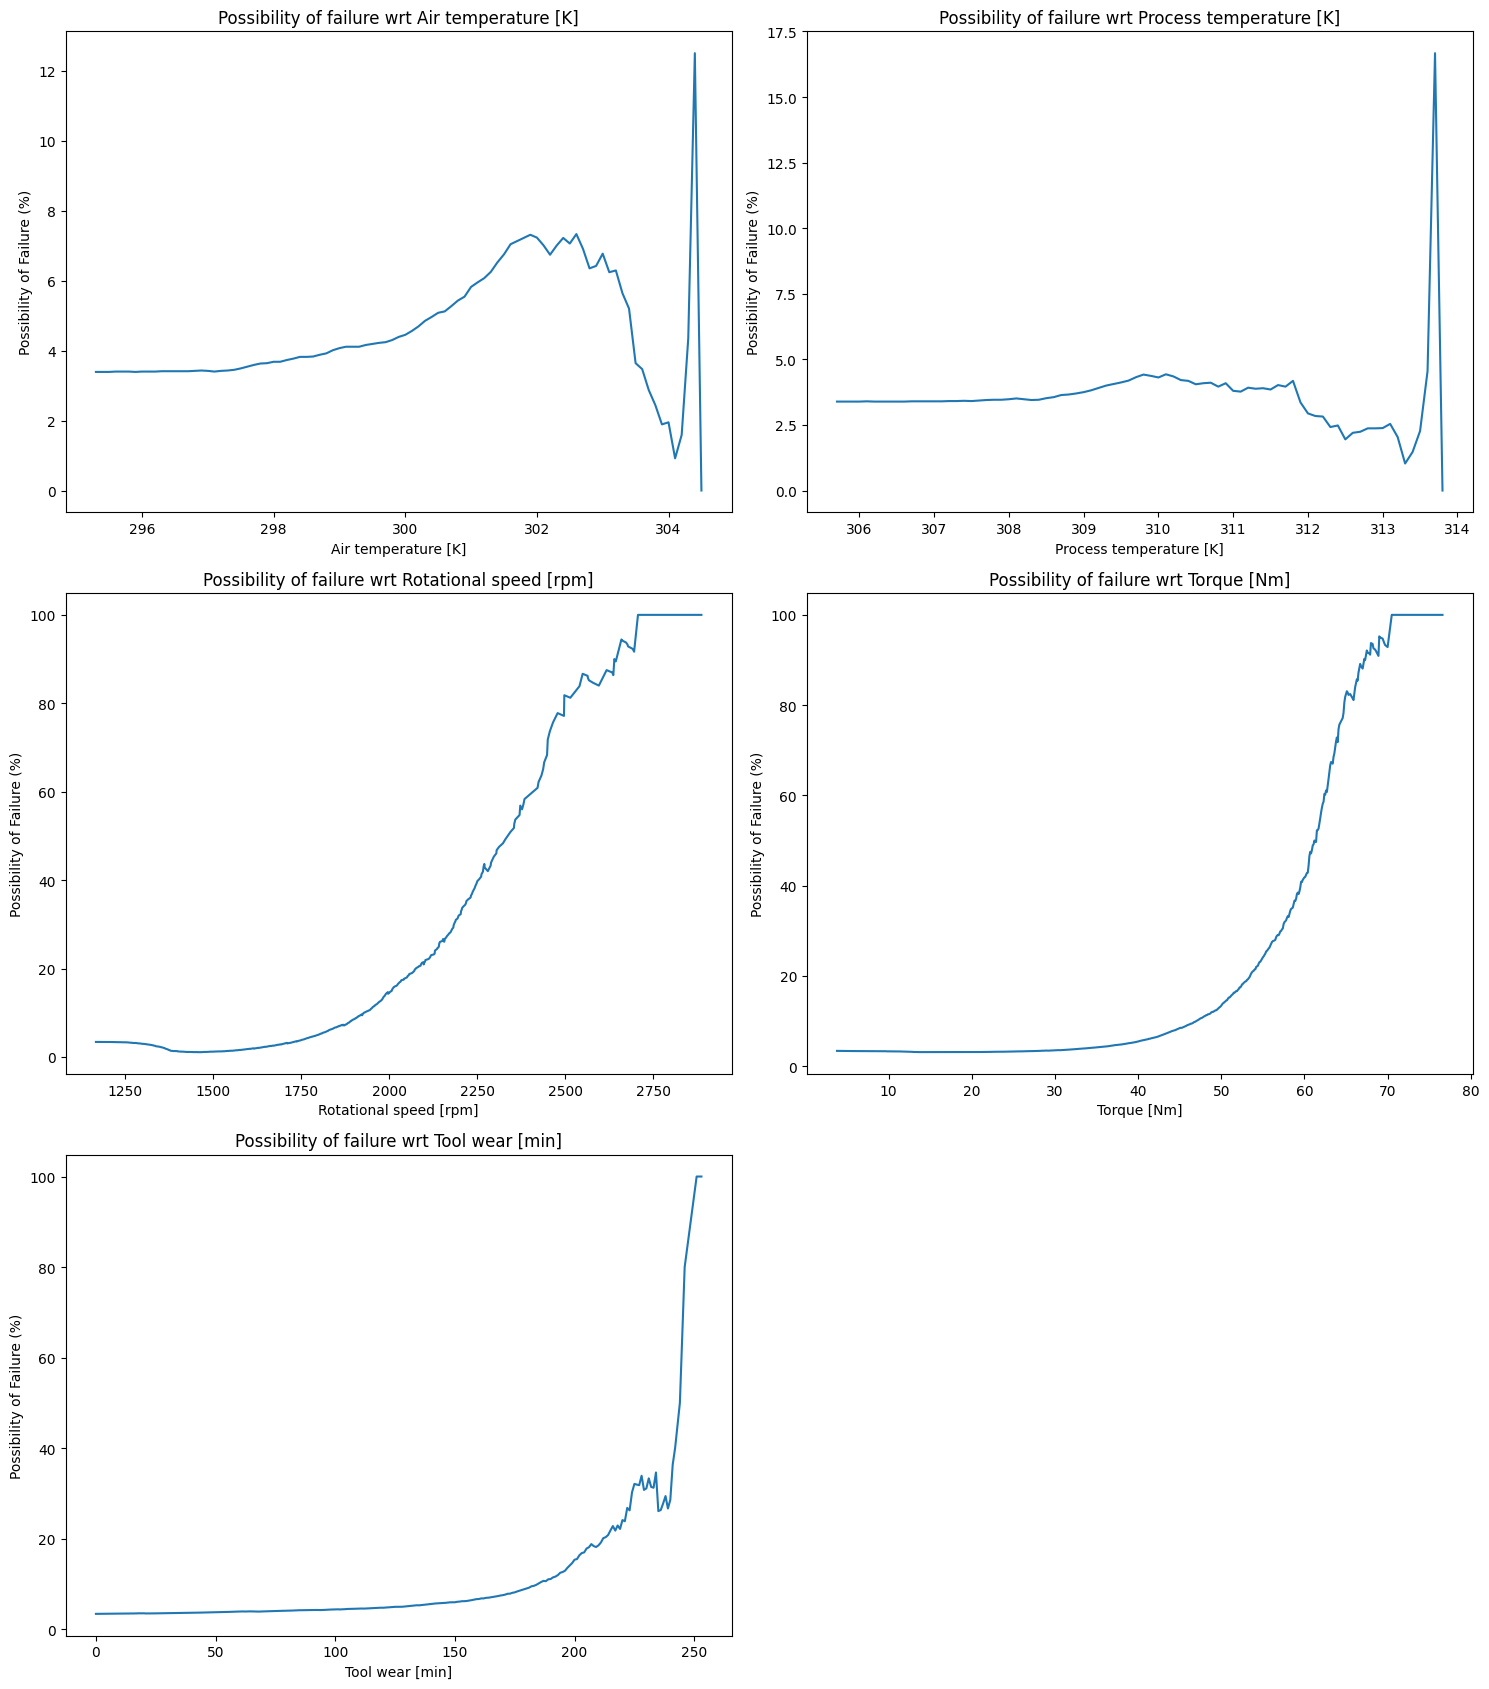

In [54]:
plt.figure(figsize=(15, 17))

# List of features to plot
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Loop through each feature and create a subplot
for i, feature in enumerate(features, start=1):
    plt.subplot(3, 2, i)
    plt.title(f"Possibility of failure wrt {feature}")
    x, y = feat_prob(feature, df)
    sns.lineplot(x=x, y=y)
    plt.xlabel(feature)
    plt.ylabel("Possibility of Failure (%)")

# Adjust layout for better spacing
plt.tight_layout()

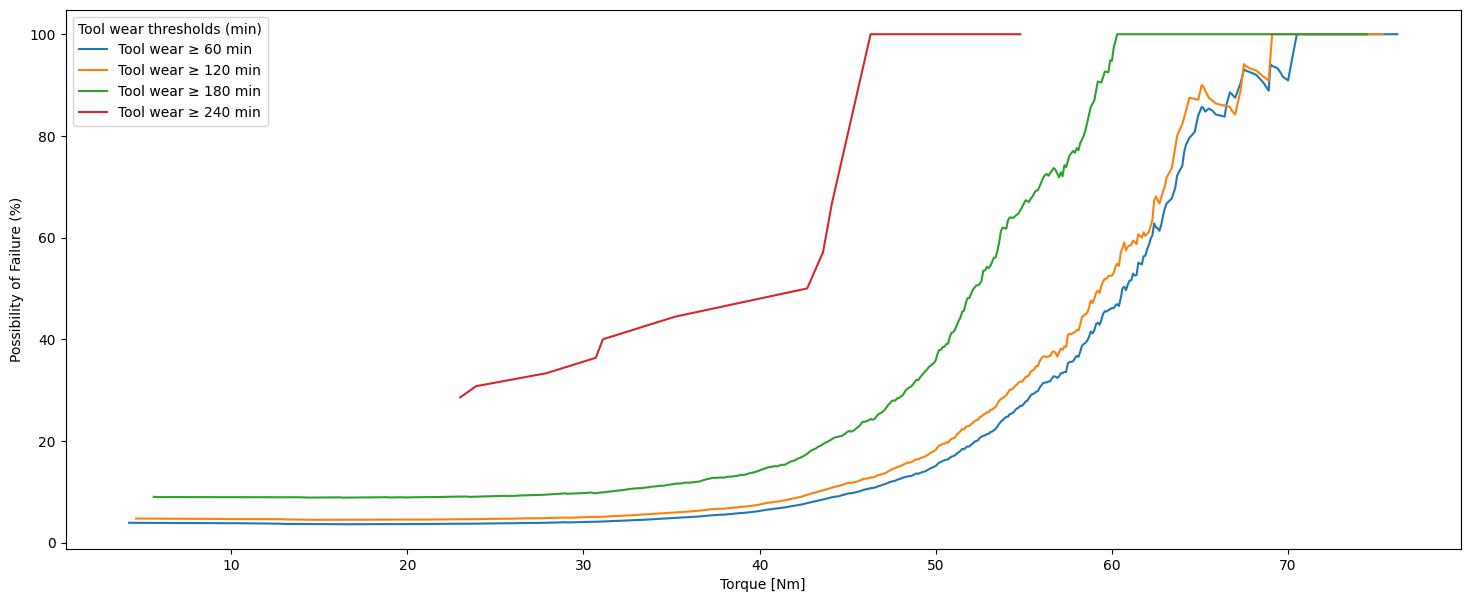

In [60]:
# Assuming df is your DataFrame containing the data
data = df

# Set up the figure with specified size
plt.figure(figsize=(18, 7))

# List of tool wear thresholds to create datasets
thresholds = [60, 120, 180, 240]

# Initialize list to hold filtered datasets
datasets = [data[data['Tool wear [min]'] >= i] for i in thresholds]

# Loop through each filtered dataset and plot the possibility of failure
for i, dataset in enumerate(datasets):
    x, y = feat_prob("Torque [Nm]", dataset)
    
    # Plot the data with labels for the axes
    sns.lineplot(x=x, y=y, label=f'Tool wear ≥ {thresholds[i]} min')
    plt.xlabel("Torque [Nm]")
    plt.ylabel("Possibility of Failure (%)")

# Add a legend to the plot with custom labels
plt.legend(title='Tool wear thresholds (min)', loc='best')

# Show the plot
plt.show()

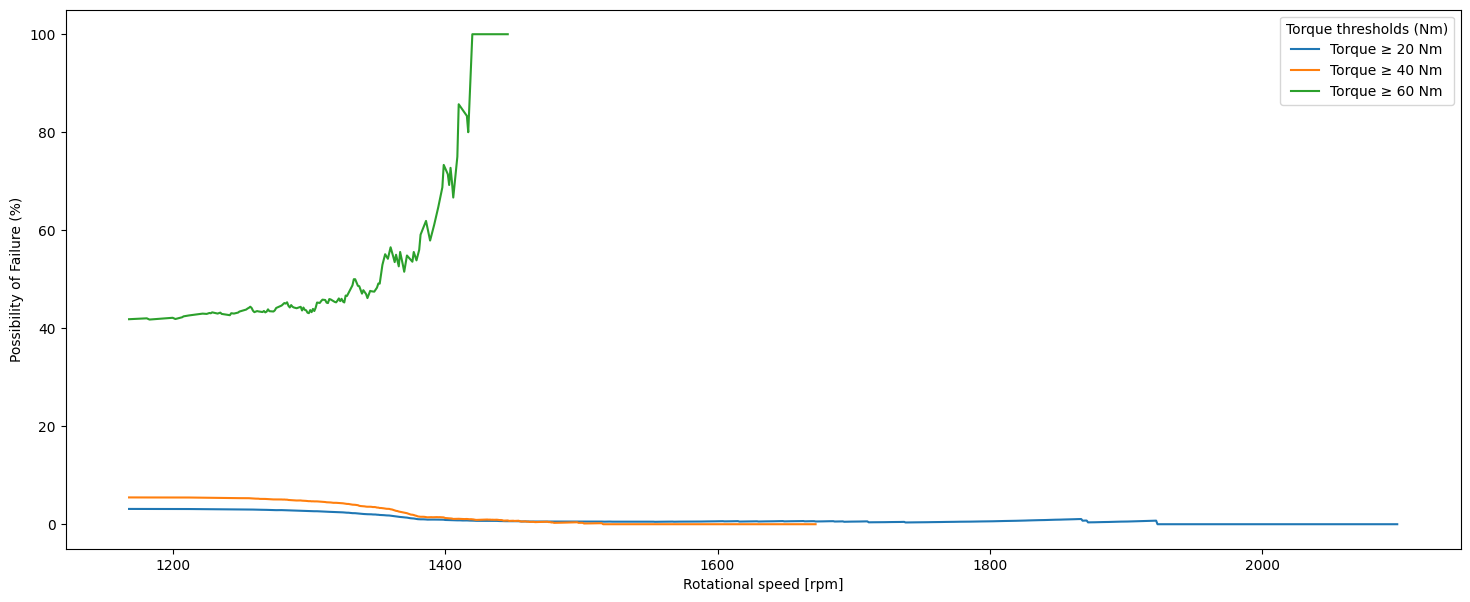

In [61]:
plt.figure(figsize=(18, 7))

# List of torque thresholds to create datasets
torque_thresholds = [20, 40, 60]

# Initialize list to hold filtered datasets
datasets = [data[data['Torque [Nm]'] >= i] for i in torque_thresholds]

# Loop through each filtered dataset and plot the possibility of failure
for i, dataset in enumerate(datasets):
    x, y = feat_prob("Rotational speed [rpm]", dataset)
    
    # Plot the data with labels for the axes and a unique label for the legend
    sns.lineplot(x=x, y=y, label=f'Torque ≥ {torque_thresholds[i]} Nm')
    plt.xlabel("Rotational speed [rpm]")
    plt.ylabel("Possibility of Failure (%)")

# Add a legend to the plot with custom labels
plt.legend(title='Torque thresholds (Nm)', loc='best')

# Show the plot
plt.show()

In [62]:
#Preprocessing of prediction


In [68]:
 df=data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

label_encoder.fit(data['Type'])
data['Type'] = label_encoder.transform(data['Type'])

label_encoder.fit(data['Target'])
data['Target'] = label_encoder.transform(data['Target'])


In [69]:
df.tail()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9995,2,298.8,308.4,1604,29.5,14,0,No Failure
9996,0,298.9,308.4,1632,31.8,17,0,No Failure
9997,2,299.0,308.6,1645,33.4,22,0,No Failure
9998,0,299.0,308.7,1408,48.5,25,0,No Failure
9999,2,299.0,308.7,1500,40.2,30,0,No Failure


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Failure Type', 'Target'],axis=1), data['Target'], test_size=0.3, random_state=42)

In [82]:
import time

from sklearn.metrics import accuracy_score,classification_report
classifier=[]
imported_as=[]

#MultiLayerPerceptron
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
classifier.append('Multi Layer Perceptron')
imported_as.append('mlp')

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
classifier.append('Logistic Regression')
imported_as.append('lr')

#RFC
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
classifier.append('Random Forest')
imported_as.append('rfc')

#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
classifier.append('k Nearest Neighbours')
imported_as.append('knn')

#SVM
from sklearn.svm import SVC
svc = SVC()
classifier.append('Support Vector Machine')
imported_as.append('svc')

classifiers = pd.DataFrame({'Classifier':classifier,'Imported as':imported_as})
print('All Models Imported\nModels stored in dataframe called classifiers')





All Models Imported
Models stored in dataframe called classifiers


In [83]:
class Modelling:
    def __init__(self, X_train, Y_train, X_test, Y_test, models):
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test
        self.models = models
    
    def fit(self):
        model_acc = []
        model_time= []
        for i in self.models:
            start=time.time()
            if i == 'knn':
                accuracy = []
                for j in range(1,200):    
                    kn = KNeighborsClassifier(n_neighbors=j)
                    kn.fit(self.X_train,self.Y_train)
                    predK = kn.predict(self.X_test)
                    accuracy.append([accuracy_score(self.Y_test,predK),j])
                temp = accuracy[0]
                for m in accuracy:
                    if temp[0] < m[0]:
                        temp=m
                i = KNeighborsClassifier(n_neighbors=temp[1])
            i.fit(self.X_train,self.Y_train)
            model_acc.append(accuracy_score(self.Y_test,i.predict(self.X_test)))
            stop=time.time()
            model_time.append((stop-start))
            print(i,'has been fit')
        self.models_output = pd.DataFrame({'Models':self.models,'Accuracy':model_acc,'Runtime (s)':model_time})
        
    def results(self):
        models=self.models_output
        models = models.sort_values(by=['Accuracy','Runtime (s)'],ascending=[False,True]).reset_index().drop('index',axis=1)
        self.best = models['Models'][0]
        models['Models']=models['Models'].astype(str).str.split("(", n = 2, expand = True)[0]
        models['Accuracy']=models['Accuracy'].round(5)*100
        self.models_output_cleaned=models
        return(models)
        
    def best_model(self,type):
        if type=='model':
            return(self.best)
        elif type=='name':
            return(self.models_output_cleaned['Models'][0])
    
    def best_model_accuracy(self):
        return(self.models_output_cleaned['Accuracy'][0])
    
    def best_model_runtime(self):
        return(round(self.models_output_cleaned['Runtime (s)'][0],3))
    
    def best_model_predict(self,X_test):
        return(self.best.predict(X_test))
    
    def best_model_clmatrix(self):
        return(classification_report(self.Y_test,self.best.predict(self.X_test)))

In [84]:
display(classifiers)

,Classifier,Imported as
0,Multi Layer Perceptron,mlp
1,Logistic Regression,lr
2,Random Forest,rfc
3,k Nearest Neighbours,knn
4,Support Vector Machine,svc


In [86]:
models_to_test = [mlp,lr,rfc,knn,svc]

In [87]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 9069 to 7270
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     7000 non-null   int32  
 1   Air temperature [K]      7000 non-null   float64
 2   Process temperature [K]  7000 non-null   float64
 3   Rotational speed [rpm]   7000 non-null   int64  
 4   Torque [Nm]              7000 non-null   float64
 5   Tool wear [min]          7000 non-null   int64  
dtypes: float64(3), int32(1), int64(2)
memory usage: 355.5 KB


In [88]:
classification = Modelling(X_train,y_train,X_test,y_test,models_to_test)
classification.fit()

MLPClassifier() has been fit
LogisticRegression() has been fit
RandomForestClassifier() has been fit
KNeighborsClassifier(n_neighbors=1) has been fit
SVC() has been fit


In [89]:
classification.results()

,Models,Accuracy,Runtime (s)
0,RandomForestClassifier,98.600,0.964020
1,MLPClassifier,97.500,0.769017
2,LogisticRegression,97.333,0.066714
3,SVC,96.933,0.330652
4,KNeighborsClassifier,95.967,0.188751


In [90]:
print('BestModel is:',  classification.best_model(type='name'))
print('Accuracy of model:',classification.best_model_accuracy())
print('Training Runtime in seconds',classification.best_model_runtime())
print('Classification Matrix:\n')
print(classification.best_model_clmatrix())

BestModel is: RandomForestClassifier
Accuracy of model: 98.6
Training Runtime in seconds 0.964
Classification Matrix:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2907
           1       0.90      0.61      0.73        93

    accuracy                           0.99      3000
   macro avg       0.95      0.81      0.86      3000
weighted avg       0.99      0.99      0.98      3000



In [92]:
import pickle

In [94]:
with open('model_pickle','wb') as f:
    pickle.dump(classification,f)

In [95]:
with open ('model_pickle','rb') as f:
    model=pickle.load(f)